In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.224760,1.041480,3.663069e-08,0.186748,1.000560,-0.009284,0.151962,0.915196,-0.021008,0.144603,...,0.332893,0.857276,-0.084017,0.353367,0.812210,-0.086086,0.370541,0.769974,-0.085019,iloveu
1,0.224465,1.052389,3.300986e-08,0.184394,1.006322,-0.010539,0.151941,0.921756,-0.023560,0.143491,...,0.334464,0.858602,-0.078271,0.355015,0.814268,-0.078690,0.371164,0.773511,-0.075976,iloveu
2,0.226575,1.055537,8.986443e-09,0.187178,1.009206,-0.010245,0.154519,0.922325,-0.023222,0.146282,...,0.335515,0.861415,-0.078519,0.357323,0.816258,-0.079376,0.374423,0.775077,-0.077235,iloveu
3,0.230669,0.997383,1.806981e-07,0.265578,0.977542,-0.011276,0.297646,0.922995,-0.023949,0.323982,...,0.238707,0.828183,-0.065048,0.253130,0.788787,-0.068365,0.263588,0.758931,-0.070422,iloveu
4,0.296707,1.037001,6.062202e-07,0.341260,0.999372,-0.025562,0.370166,0.953065,-0.047748,0.392622,...,0.211863,0.927295,-0.103388,0.188472,0.897600,-0.119738,0.168480,0.868719,-0.129523,iloveu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
95,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
96,0.214710,1.058738,-2.331427e-07,0.168694,1.009812,-0.014325,0.135936,0.932008,-0.030051,0.119098,...,0.323474,0.871260,-0.059717,0.343513,0.820639,-0.058813,0.356713,0.774298,-0.058183,iloveu
97,0.210294,1.065654,2.898577e-07,0.170375,1.016061,-0.009909,0.144799,0.930364,-0.024424,0.136427,...,0.317301,0.874059,-0.072855,0.335265,0.822432,-0.071213,0.350170,0.777419,-0.066153,iloveu


In [11]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.224760,1.041480,3.663069e-08,0.186748,1.000560,-0.009284,0.151962,0.915196,-0.021008,0.144603,...,0.332893,0.857276,-0.084017,0.353367,0.812210,-0.086086,0.370541,0.769974,-0.085019,iloveu
1,0.224465,1.052389,3.300986e-08,0.184394,1.006322,-0.010539,0.151941,0.921756,-0.023560,0.143491,...,0.334464,0.858602,-0.078271,0.355015,0.814268,-0.078690,0.371164,0.773511,-0.075976,iloveu
2,0.226575,1.055537,8.986443e-09,0.187178,1.009206,-0.010245,0.154519,0.922325,-0.023222,0.146282,...,0.335515,0.861415,-0.078519,0.357323,0.816258,-0.079376,0.374423,0.775077,-0.077235,iloveu
3,0.230669,0.997383,1.806981e-07,0.265578,0.977542,-0.011276,0.297646,0.922995,-0.023949,0.323982,...,0.238707,0.828183,-0.065048,0.253130,0.788787,-0.068365,0.263588,0.758931,-0.070422,iloveu
4,0.296707,1.037001,6.062202e-07,0.341260,0.999372,-0.025562,0.370166,0.953065,-0.047748,0.392622,...,0.211863,0.927295,-0.103388,0.188472,0.897600,-0.119738,0.168480,0.868719,-0.129523,iloveu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
95,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,iloveu
96,0.214710,1.058738,-2.331427e-07,0.168694,1.009812,-0.014325,0.135936,0.932008,-0.030051,0.119098,...,0.323474,0.871260,-0.059717,0.343513,0.820639,-0.058813,0.356713,0.774298,-0.058183,iloveu
97,0.210294,1.065654,2.898577e-07,0.170375,1.016061,-0.009909,0.144799,0.930364,-0.024424,0.136427,...,0.317301,0.874059,-0.072855,0.335265,0.822432,-0.071213,0.350170,0.777419,-0.066153,iloveu


In [12]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (99, 63)
Labels shape = (99,)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
y_pred = svm.predict(x_test)
y_pred

array(['2', '1', '5', '5', '3', '4', '3', 'iloveu', 'iloveu', '5', '5',
       '4', 'iloveu', 'iloveu', '4', '4', '3', '4', '3', '4', '3', '1',
       '3', '2', '3', 'iloveu', '1', '1', '4', 'iloveu', '5', '2', '3',
       'iloveu', '1', '5', '4', 'iloveu', '4', '3', '4', '1', '2', '1',
       '4', '1', '5', '5', '4', '2', '5', '2', '3', '3', '2', '5',
       'iloveu', '4', '2', '4', '3', '5', '2', '5', 'iloveu', '1', '2',
       '4', '1', '2', '1', '1', '4', '4', '5', '4', '3', '1', '4', '3',
       '1', '1', '1', '1', 'iloveu', '5', '3', 'iloveu', '5', 'iloveu',
       '4', '5', '1', '2', '1', '1', '2', '2', '3', '1', '1', 'iloveu',
       'iloveu', '3', '5', 'iloveu', '5', '3', '3', 'iloveu', '4', '5',
       '2', 'iloveu', '3', '1', '1', '4', '4', 'iloveu'], dtype=object)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

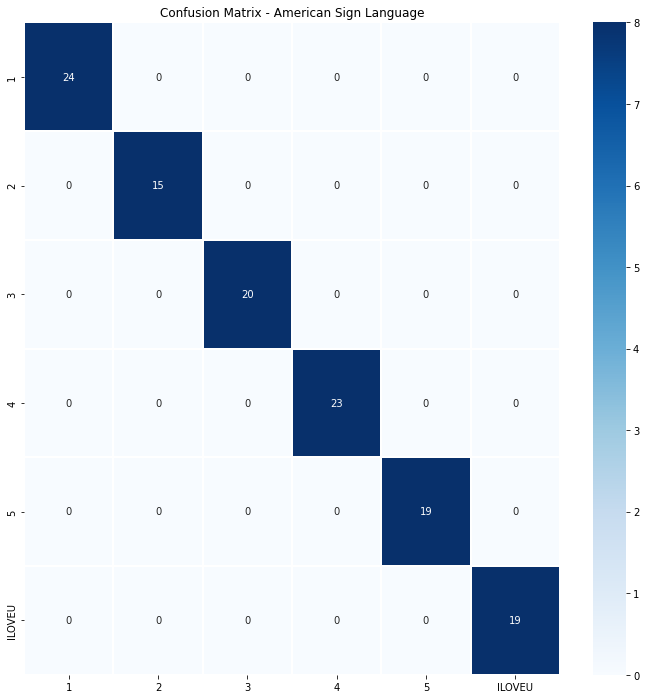

In [ ]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)

NameError: name 'svm' is not defined